In [1]:
import pandas as pd
mydata = pd.read_csv(r"D:\KCA\Network Science\Airlines.csv")

### Example 1

In [4]:
# Overview of the Data Frame
mydata.head(n=20)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance
0,2013,2,26,1807.0,1630,97.0,1956.0,1837,79.0,EV,4411,N13566,EWR,MEM,144.0,946
1,2013,8,17,1459.0,1445,14.0,1801.0,1747,14.0,B6,1171,N661JB,LGA,FLL,147.0,1076
2,2013,2,13,1812.0,1815,-3.0,2055.0,2125,-30.0,AS,7,N403AS,EWR,SEA,315.0,2402
3,2013,4,11,2122.0,2115,7.0,2339.0,2353,-14.0,B6,97,N656JB,JFK,DEN,221.0,1626
4,2013,8,5,1832.0,1835,-3.0,2145.0,2155,-10.0,AA,269,N3EYAA,JFK,SEA,358.0,2422
5,2013,6,30,1500.0,1505,-5.0,1751.0,1650,61.0,UA,685,N424UA,LGA,ORD,116.0,733
6,2013,2,14,1442.0,1445,-3.0,1833.0,1747,46.0,UA,346,N446UA,EWR,MIA,200.0,1085
7,2013,7,25,752.0,755,-3.0,1037.0,1057,-20.0,DL,2395,N909DL,LGA,PBI,140.0,1035
8,2013,7,10,557.0,600,-3.0,725.0,715,10.0,MQ,3267,N542MQ,EWR,ORD,113.0,719
9,2013,12,13,1907.0,1915,-8.0,2155.0,2219,-24.0,DL,2159,N909DE,JFK,MCO,138.0,944


In [8]:
# Creating the World into which the graph will exist
import networkx as nx
GG = nx.Graph()

In [9]:
GG.nodes()       # Empty since we have not added any Nodes yet

NodeView(())

In [11]:
GG.edges()      # Empty since we have not added any Edges yet

EdgeView([])

In [12]:
# Trimming dataframe into only needed columns, i.e., 'flight', 'dest'
mydata1 = mydata[['flight', 'dest']]


In [14]:
# Getting an overview of the New Dataframe
mydata1.head(n=10)

,flight,dest
0,4411,MEM
1,1171,FLL
2,7,SEA
3,97,DEN
4,269,SEA
5,685,ORD
6,346,MIA
7,2395,PBI
8,3267,ORD
9,2159,MCO


In [15]:
# Adding the edges using pandas to created Graph 'GG'
GG = nx.from_pandas_edgelist(mydata1, 'flight', 'dest')

In [16]:
# Checking the NEW outlook of the Graph based on Nodes
GG.nodes()

NodeView((4411, 'MEM', 1171, 'FLL', 7, 'SEA', 97, 'DEN', 269, 685, 'ORD', 346, 'MIA', 2395, 'PBI', 3267, 2159, 'MCO', 4429, 'CMH', 4348, 'MSP', 4963, 5689, 'IAD', 1433, 'CLT', 1157, 2003, 425, 'TPA', 2163, 'DCA', 413, 'SJU', 2043, 'ATL', 5038, 'BHM', 6101, 341, 'SRQ', 3792, 684, 4304, 'MSY', 2085, 3424, 'DTW', 523, 'LAX', 677, 'JAX', 4447, 'RDU', 947, 983, 2284, 'MDW', 390, 4649, 3478, 883, 'DFW', 527, 'IAH', 309, 1847, 15, 1150, 'SFO', 679, 1879, 493, 'STL', 3795, 'CVG', 671, 4085, 'IND', 526, 4138, 305, 2139, 1885, 3824, 2370, 4471, 1511, 'RSW', 1747, 1545, 1077, 1925, 314, 3466, 5148, 4559, 3365, 1602, 2131, 1716, 985, 991, 615, 1532, 'BOS', 4120, 'CLE', 537, 630, 5164, 4105, 1491, 1735, 418, 434, 83, 1029, 21, 2041, 1853, 3644, 405, 1875, 1605, 256, 215, 490))

In [17]:
# Checking the outlook of the Graph based on Edges
GG.edges()

EdgeView([(4411, 'MEM'), (1171, 'FLL'), ('FLL', 15), ('FLL', 83), (7, 'SEA'), ('SEA', 269), (97, 'DEN'), ('DEN', 390), (685, 'ORD'), ('ORD', 3267), ('ORD', 309), ('ORD', 305), ('ORD', 341), ('ORD', 434), (346, 'MIA'), ('MIA', 2003), ('MIA', 2139), ('MIA', 1077), ('MIA', 1925), (2395, 'PBI'), ('PBI', 2370), ('PBI', 991), ('PBI', 537), (2159, 'MCO'), ('MCO', 1885), ('MCO', 883), ('MCO', 405), (4429, 'CMH'), (4348, 'MSP'), ('MSP', 4963), ('MSP', 1157), ('MSP', 4649), ('MSP', 5164), (5689, 'IAD'), ('IAD', 6101), ('IAD', 3824), ('IAD', 4105), (1433, 'CLT'), ('CLT', 2085), ('CLT', 1879), ('CLT', 1491), (425, 'TPA'), ('TPA', 684), ('TPA', 983), ('TPA', 985), ('TPA', 1875), (2163, 'DCA'), ('DCA', 3792), ('DCA', 3365), (413, 'SJU'), (413, 'LAX'), ('SJU', 1029), ('SJU', 215), (2043, 'ATL'), ('ATL', 947), ('ATL', 1847), ('ATL', 1747), ('ATL', 1716), ('ATL', 2041), ('ATL', 3644), (5038, 'BHM'), (341, 'SRQ'), (4304, 'MSY'), (3424, 'DTW'), ('DTW', 3478), ('DTW', 2131), (523, 'LAX'), ('LAX', 671), ('

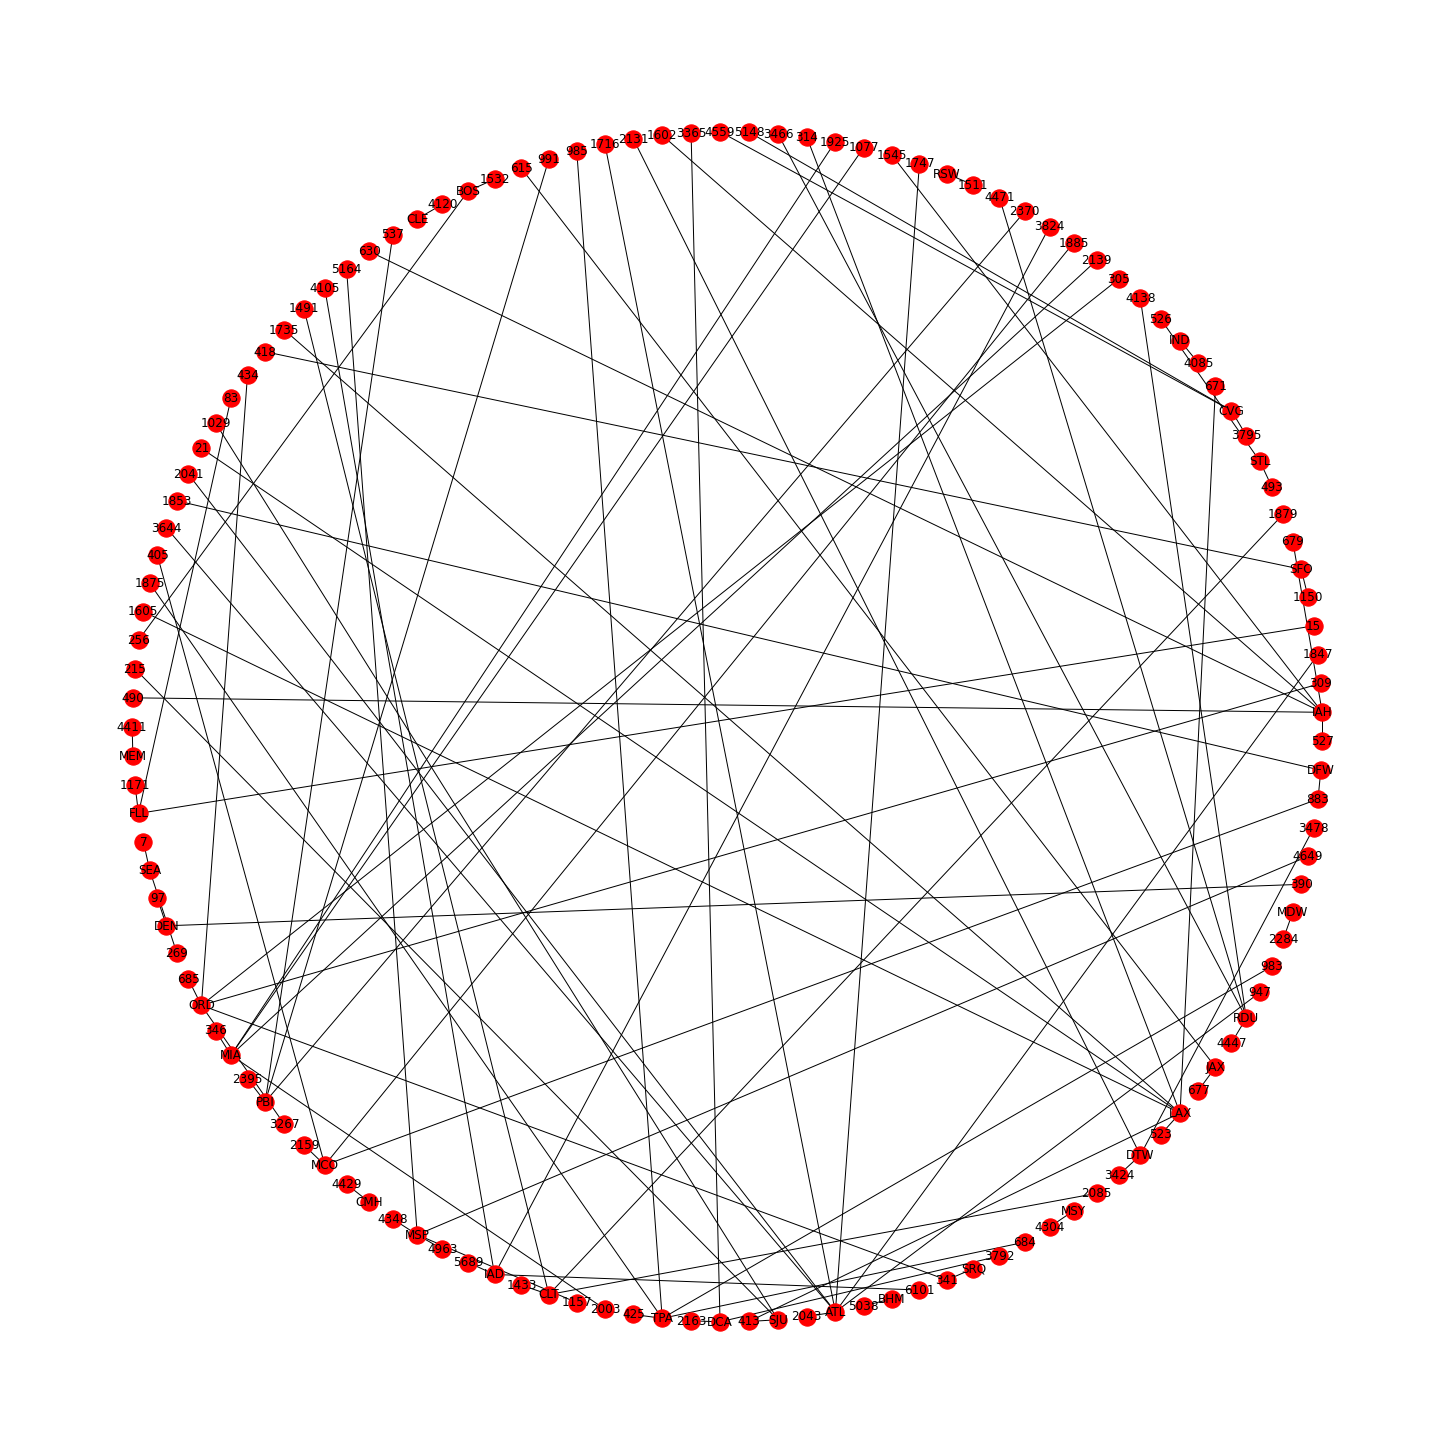

In [20]:
# Now, we need to visualize the Graph 'GG'
# Here, matplotlib.pyplot becomes useful

from matplotlib.pyplot import figure
figure(figsize=(20, 20))                                    # Specifying the figure size
nx.draw_shell(GG,  with_labels=True, node_color='red')

### Example 2: In this section, we focus on 'Carrier' and 'Destination'

In [21]:
# Creating the world for new Graph 'GW'
GW = nx.Graph()

In [22]:
# Picking needed columns from original data
mydata2 = mydata[['carrier', 'dest']]

In [23]:
# Dataframe overview
mydata2.head(10)

,carrier,dest
0,EV,MEM
1,B6,FLL
2,AS,SEA
3,B6,DEN
4,AA,SEA
5,UA,ORD
6,UA,MIA
7,DL,PBI
8,MQ,ORD
9,DL,MCO


In [24]:
# Adding data frame to Graph 'GW'

GW = nx.from_pandas_edgelist(mydata2, 'carrier', 'dest')

In [25]:
GW.nodes()

NodeView(('EV', 'MEM', 'B6', 'FLL', 'AS', 'SEA', 'DEN', 'AA', 'UA', 'ORD', 'MIA', 'DL', 'PBI', 'MQ', 'MCO', 'CMH', 'MSP', 'IAD', 'US', 'CLT', 'TPA', 'DCA', 'SJU', 'ATL', 'BHM', 'SRQ', 'MSY', '9E', 'DTW', 'LAX', 'JAX', 'RDU', 'WN', 'MDW', 'DFW', 'IAH', 'SFO', 'STL', 'CVG', 'IND', 'RSW', 'BOS', 'VX', 'CLE'))

In [26]:
GW.edges()

EdgeView([('EV', 'MEM'), ('EV', 'MSP'), ('EV', 'IAD'), ('EV', 'BHM'), ('EV', 'MSY'), ('EV', 'IND'), ('EV', 'RDU'), ('EV', 'CVG'), ('B6', 'FLL'), ('B6', 'DEN'), ('B6', 'TPA'), ('B6', 'SRQ'), ('B6', 'LAX'), ('B6', 'JAX'), ('B6', 'RSW'), ('B6', 'PBI'), ('B6', 'MCO'), ('B6', 'SJU'), ('FLL', 'DL'), ('AS', 'SEA'), ('SEA', 'AA'), ('DEN', 'WN'), ('AA', 'SJU'), ('AA', 'DFW'), ('AA', 'ORD'), ('AA', 'MIA'), ('AA', 'LAX'), ('AA', 'BOS'), ('UA', 'ORD'), ('UA', 'MIA'), ('UA', 'TPA'), ('UA', 'IAH'), ('UA', 'SFO'), ('UA', 'LAX'), ('UA', 'BOS'), ('UA', 'PBI'), ('UA', 'MCO'), ('ORD', 'MQ'), ('MIA', 'DL'), ('DL', 'PBI'), ('DL', 'MCO'), ('DL', 'MSP'), ('DL', 'ATL'), ('DL', 'DTW'), ('DL', 'TPA'), ('MQ', 'CMH'), ('MQ', 'DCA'), ('MQ', 'RDU'), ('MQ', 'MSP'), ('MQ', 'DTW'), ('MQ', 'ATL'), ('IAD', '9E'), ('US', 'CLT'), ('US', 'DCA'), ('ATL', 'WN'), ('9E', 'DTW'), ('9E', 'CVG'), ('9E', 'CLE'), ('LAX', 'VX'), ('WN', 'MDW'), ('WN', 'STL')])

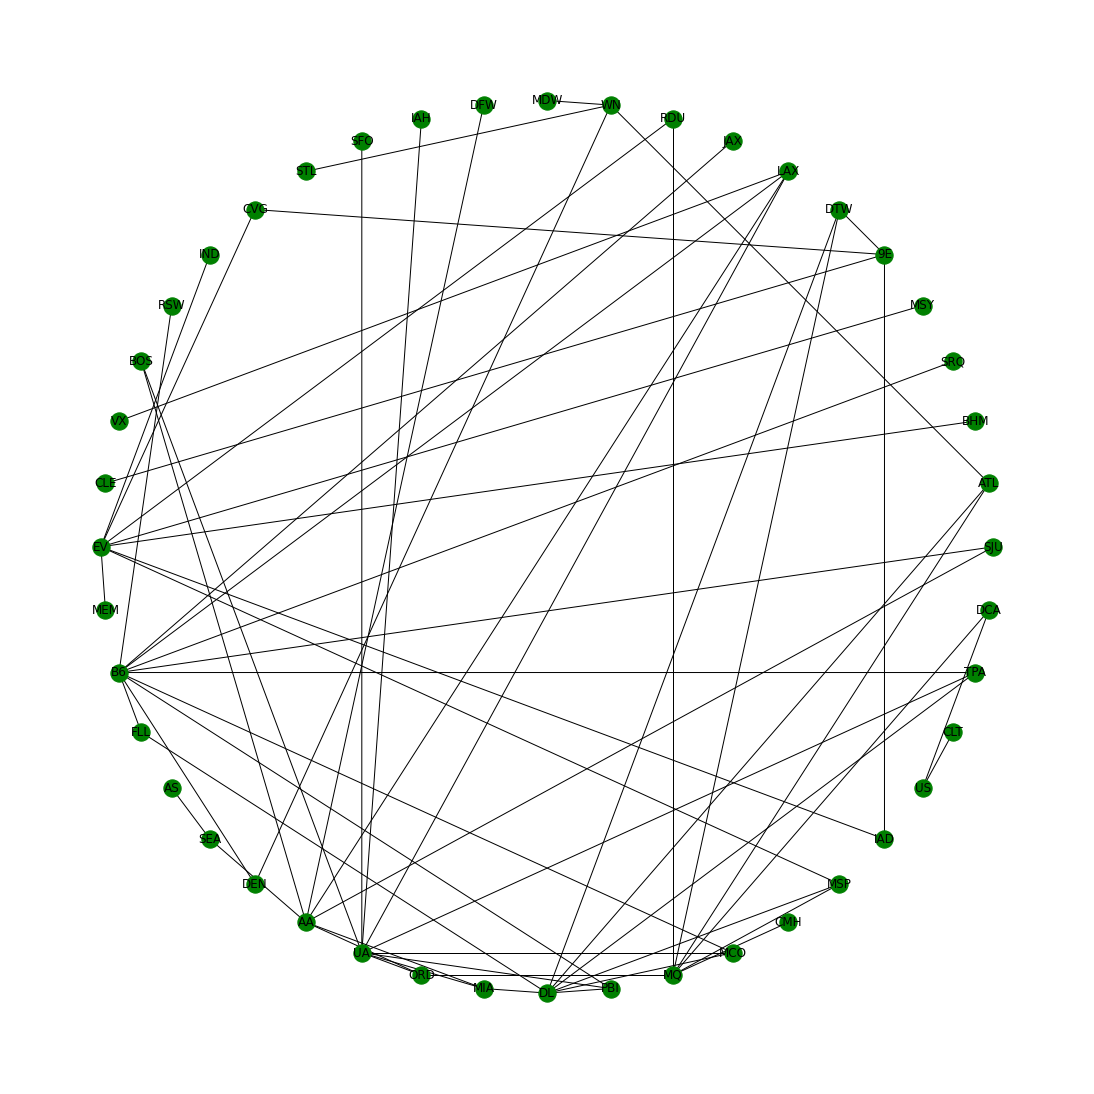

In [27]:
# Visualizing the Graph GW now

figure(figsize=(15, 15))
nx.draw_shell(GW, with_labels=True, node_color='green')

### Example 3: In this last example, the focus is on 'Origin', and 'Destination'

In [29]:
# Picking only the needed columns from original data [mydata]
mydata3 = mydata[['origin', 'dest']]

In [30]:
# Creating Graph 'GS' that will hold the nodes and edges
GS = nx.Graph()

In [31]:
# Getting an overview of the data
mydata3.head(10)

,origin,dest
0,EWR,MEM
1,LGA,FLL
2,EWR,SEA
3,JFK,DEN
4,JFK,SEA
5,LGA,ORD
6,EWR,MIA
7,LGA,PBI
8,EWR,ORD
9,JFK,MCO


In [32]:
# Now, adding the dataframe to the Graph 'GS' containing 'origin' and 'dest'
GS = nx.from_pandas_edgelist(mydata3, 'origin', 'dest')

In [33]:
# Outlook of the Graph based on Nodes
GS.nodes()

NodeView(('EWR', 'MEM', 'LGA', 'FLL', 'SEA', 'JFK', 'DEN', 'ORD', 'MIA', 'PBI', 'MCO', 'CMH', 'MSP', 'IAD', 'CLT', 'TPA', 'DCA', 'SJU', 'ATL', 'BHM', 'SRQ', 'MSY', 'DTW', 'LAX', 'JAX', 'RDU', 'MDW', 'DFW', 'IAH', 'SFO', 'STL', 'CVG', 'IND', 'RSW', 'BOS', 'CLE'))

In [34]:
# Outlook of Graph based on Edges
GS.edges()

EdgeView([('EWR', 'MEM'), ('EWR', 'SEA'), ('EWR', 'MIA'), ('EWR', 'ORD'), ('EWR', 'MSP'), ('EWR', 'TPA'), ('EWR', 'MSY'), ('EWR', 'DFW'), ('EWR', 'IAH'), ('EWR', 'SFO'), ('EWR', 'CVG'), ('EWR', 'IND'), ('EWR', 'RDU'), ('EWR', 'IAD'), ('EWR', 'RSW'), ('EWR', 'BOS'), ('EWR', 'PBI'), ('EWR', 'LAX'), ('EWR', 'MCO'), ('EWR', 'SJU'), ('LGA', 'FLL'), ('LGA', 'ORD'), ('LGA', 'PBI'), ('LGA', 'CMH'), ('LGA', 'IAD'), ('LGA', 'CLT'), ('LGA', 'MIA'), ('LGA', 'DCA'), ('LGA', 'BHM'), ('LGA', 'RDU'), ('LGA', 'ATL'), ('LGA', 'TPA'), ('LGA', 'MDW'), ('LGA', 'DEN'), ('LGA', 'MSP'), ('LGA', 'DTW'), ('LGA', 'STL'), ('LGA', 'MCO'), ('LGA', 'CVG'), ('LGA', 'IAH'), ('FLL', 'JFK'), ('SEA', 'JFK'), ('JFK', 'DEN'), ('JFK', 'MCO'), ('JFK', 'TPA'), ('JFK', 'SJU'), ('JFK', 'ATL'), ('JFK', 'SRQ'), ('JFK', 'DCA'), ('JFK', 'DTW'), ('JFK', 'LAX'), ('JFK', 'JAX'), ('JFK', 'CLT'), ('JFK', 'PBI'), ('JFK', 'CLE'), ('JFK', 'IAD'), ('JFK', 'BOS')])

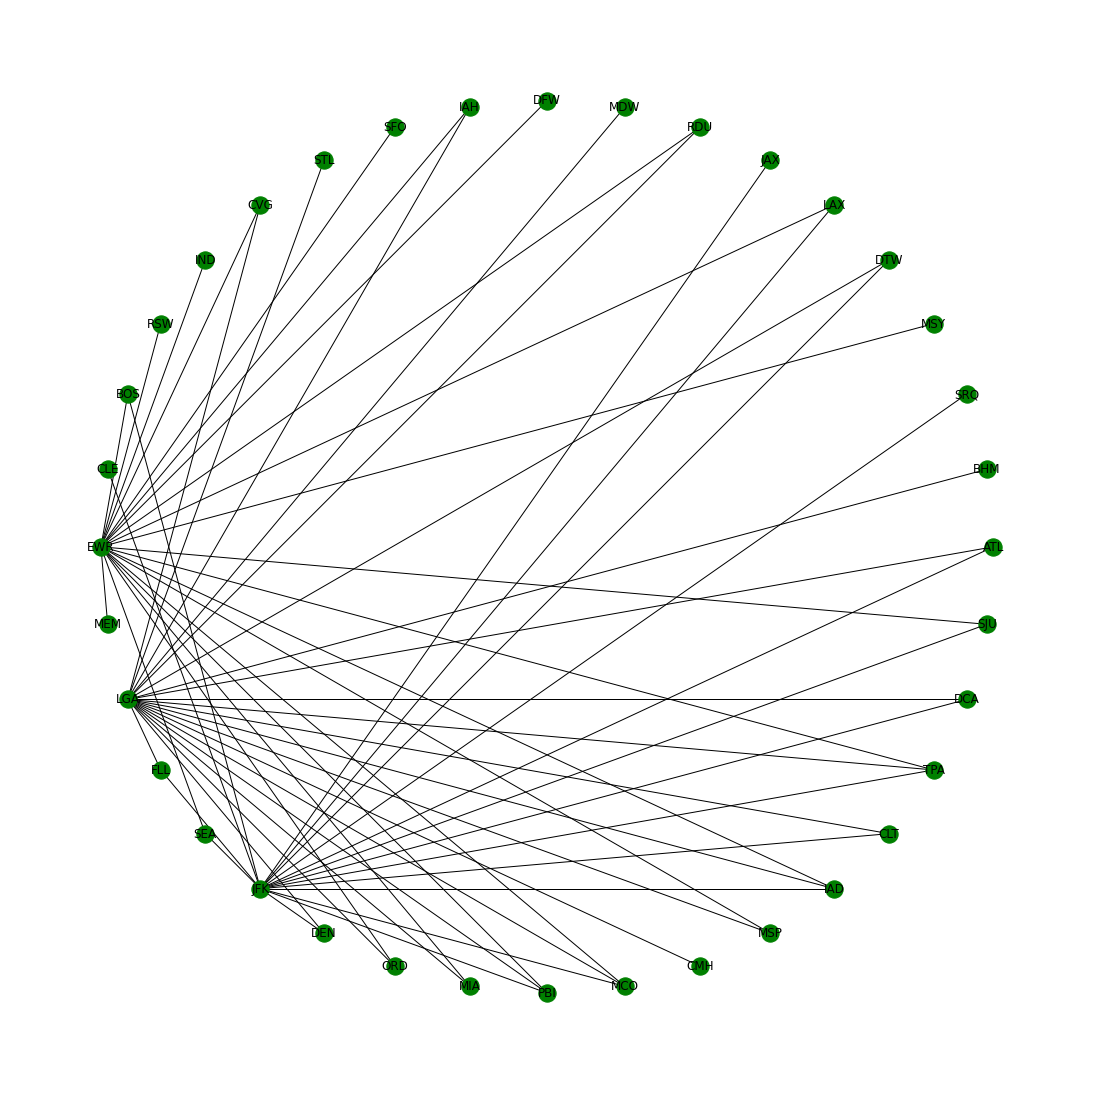

In [35]:
# Finally, visualizing the Graph

figure(figsize=(15, 15))
nx.draw_shell(GS, with_labels=True, node_color='green')